# Assignment 2
## Matthew Kern (mjkern)
### Setup:

In [1]:
# toggle where to load the files from
UseGitHub = True # True
if UseGitHub:
    prefix = 'https://raw.githubusercontent.com/ProfRaja/67364/master/data/a2/'
else:
    prefix = '' # load locally

expeditions_xls = prefix + 'Expeditions.xls'
titles_sv = prefix + 'titles.csv'
cast_csv = prefix + 'cast_4_1960.csv'
release_dates_csv = prefix + 'release_dates.csv'

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Pivot Tables
Creating the desired pivot table

In [2]:
# read data from excel file
exped = pd.read_excel(expeditions_xls)

# creat the pivot table
result = exped.pivot_table(index='WHERE',
                 columns='HOW',
                 values='REVENUE',
                 aggfunc=np.sum)

# add the total row/column
result['Total'] = result.sum(axis=1)
result.loc['Total'] = result.sum()
result

HOW,Catalog,Store,Web,Total
WHERE,,,,
London,50310,151015,13009,214334
New York,8712,28060,2351,39123
Paris,32166,104083,7054,143303
Sydney,5471,21769,2749,29989
Tokyo,12103,42610,2003,56716
Total,108762,347537,27166,483465


### Part 2: Data Cleansing and Plotting
This is data from wikipedia's list of tallest buildings and structures analyzed with Benford's Law

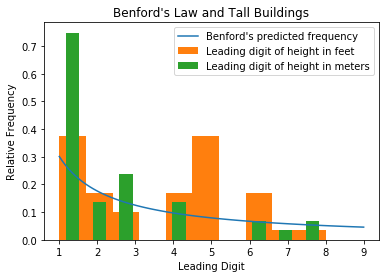

In [3]:
### plot curve for Benford's law ###

x = np.linspace(1, 9, 100) # use lots of points for a smooth curve
y = np.log10(1 + (1 / x)) # fing the y value for each point
plt.plot(x, y, label="Benford's predicted frequency") # and plot it

### plot a histgoram of the leading digits ###
### of heights of the talllest buildings   ###

# start by getting the info from wikipedia
link = 'https://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures'
tbls = pd.read_html(link)
buildings = tbls[3] # the table we want is at index 3

# move the top row to the comumn names
buildings.columns = buildings.loc[0]
buildings = buildings.drop([0, 1])

# plot the histogram on the same graph
# tricky lambda gets the first digit of the number
plt.hist(x=buildings['Height (feet)'].apply(lambda x: int(x[0])), 
         density=True, # density flag makes this a frequency histogram
         label='Leading digit of height in feet')

# now do the same thing for meters
plt.hist(x=buildings['Height (meters)'].apply(lambda x: int(x[0])),
         density=True,
         rwidth=0.5, # make the bars narrow so you can see both plots
         label='Leading digit of height in meters') 
### and make it all nice ###
plt.title("Benford's Law and Tall Buildings")
plt.legend()
plt.xlabel('Leading Digit')
plt.ylabel('Relative Frequency')

plt.show()

### Part 3: Simple question from the IMDB
The following questions will use the data sets read in below.

In [4]:
cast = pd.read_csv(cast_csv)
releases = pd.read_csv(release_dates_csv)
titles = pd.read_csv(titles_sv)

#### a) The ten most common movie names
The following code determines the ten most common movie names in the data set by finding the count of each unique title, sorting it by the count, and then listing the first 10 items. The titles are reported in descending order of frequency, ties being broken arbitrarily.

In [5]:
titles['title'].value_counts().sort_values(ascending=False).head(10)

Hamlet                  20
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Freedom                 11
The Three Musketeers    11
Kismet                  11
Temptation              11
Othello                 11
Name: title, dtype: int64

#### b) Plot of the number of films released in each decade
The following code plots a histogram of the number of films released by decade by creating a histogram of the years when films are released and making a bin (a bar) for each decade.

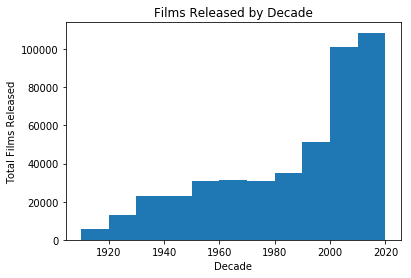

In [6]:
plt.hist(releases['year'],
         bins=range(1910,2030,10)) # bins by decade
plt.title('Films Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Films Released')
plt.show()

#### c) Same plot, made with groupby()
The following code creates the same plot as above (the films by decade) but this time the films are grouped by decade and counted, and then these values are used to create a bar chart with essentially the same information as the histogram above.

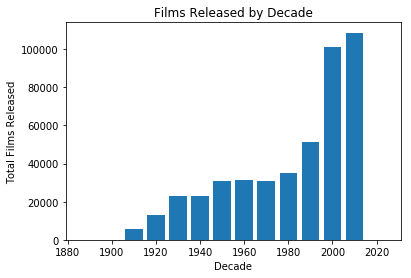

In [7]:
# create a decade column
releases['decade'] = releases['year']//10*10

# group by it and get the size of the groups
grouped = releases.groupby(by='decade').apply(len)

# create the bar chart (width is purely aesthetic)
plt.bar(grouped.index, grouped.values, width=8)
plt.title('Films Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Films Released')
plt.show()

#### d) Months with USA release dates of films with Tom Cruise
The following code creates a histogram showing the release month (as an integer) of films released in the US featuring Tom Cruise. It merges the release and cast data and then repeatedly used boolean masks to filter out the unwanted information.

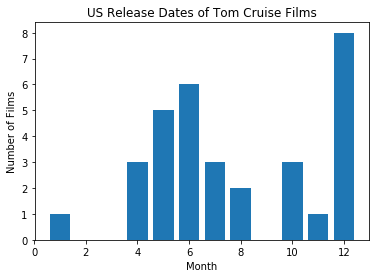

In [8]:
# merge the data sets
df = releases.merge(cast)

# use boolean masks to select USA releases of tom cruise movies
bm1 = df['name'] == 'Tom Cruise'
tc_movies = df.loc[bm1]
bm2 = tc_movies['country'] == 'USA'
# tricky lambda get the month as an integer
result = tc_movies[bm2]['date'].apply(lambda d: int(d[5:7])).value_counts()

# and make the plot
plt.bar(result.index, result.values)
plt.title('US Release Dates of Tom Cruise Films')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.show()

#### e) My Own Query
Which country had the highest ratio of actresses to actors in their films?

The works by merging information about releases and casts, counting the actors and actresses for each country, re-merging the actor and actress information together, calculation the ratio and then finding the maximum.

In [9]:
# merge the cast and release data
df = releases.merge(cast)

# get the count of actors and actresses for each country
bm1 = df['type'] == 'actress'
actresses = df[bm]['country'].value_counts()
bm2 = df['type'] == 'actor'
actors = df[bm2]['country'].value_counts()

# merge the counts for actors and actresses for each country
# silently get rid of countries that don't have both
#     (and thus could have an undefined ratio)
merged = pd.DataFrame({'country' : actresses.index, 
                       'actresses' : actresses.values}
                     ).merge(
         pd.DataFrame({'country' : actors.index,
                       'actors' : actors.values}))

# calculate the ratio and get the max
merged['ratio'] = merged['actresses'] / merged['actors']
merged.sort_values('ratio', ascending=False).head(1)


NameError: name 'bm' is not defined